## Why OpenCV?
- Compatible in multiple MAJOR OS, like Windows, Linux and MacOS, can be written in different languages: C++, Python and Java.
- Interoperable with Numpy modules, thereby faster computation of image array
- Large community support, a lot of resources (articles and stackoverflow posts)

## Image formats
- JPEG (.jpg, .jpeg, .jfif)
    -photos taken from camera
- PNG(.png)
    -website, larger file size compared to JPEG
- tiff (.tif)
    - high-quality printing, large file size.
- bmp (.bmp)
    - high-quality printing, large file size.
- GIF (.fig) (openCV can't deal with this format
    - animations, shallow color depth
- webp (.webp)
    - smaller file size compared to JPEG and PNG, IE 11 not supported

In [1]:
#!pip install opencv-contrib-python

In [2]:
import sys
# at least Python 3.7
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv

## Load and show images

In [ ]:
img = cv.imread("images/lena.jfif")
# second argument: 1(default), 0(grayscale), -1(cv.IMREAD_UNCHANGED, import everything)
grayscale = cv.imread("images/lena.jfif",0)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0) # key binding function: wait for user response
cv.destroyAllWindows()

In [3]:
def show_img(window_name, img):
    """2 arguments: window name and image"""
    cv.imshow(window_name, img)
    cv.waitKey(0) # key binding function: wait for user response
    cv.destroyAllWindows()

In [ ]:
#png
img = cv.imread("images/lena.png")

show_img("lena",img)

In [6]:
# difference between jpeg and png
img_jpeg = cv.imread("images/soccer.jpg", -1)
img_png = cv.imread("images/lena.png", -1)

# 3rd dimension of jpeg is 3, png is 4
print(f"shape of jpeg image: {img_jpeg.shape}")
print(f"shape of png image: {img_png.shape}")


shape of jpeg image: (1200, 800, 3)
shape of png image: (225, 225, 4)


## gif
import new module

In [4]:
#!pip install imageio
import imageio

In [8]:
#gif
GIF = imageio.mimread("images/rotating_earth_large.gif")
#change to BGR from RGB
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

#show_img("gif",imgs[0])
for img in imgs:
    cv.imshow("gif",img) 
    cv.waitKey(200) #if didnt have any input in 0.2s, the program will continue running
    
cv.destroyAllWindows()

## save images
    cv.imwrite(filepath, img)

In [9]:
# a more formalized approach
#img = cv.imread("images/lena.jfif")
img = cv.imread(cv.samples.findFile("images/lena.jfif"))
if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF
if k == 115: #  press 's' button, unicode of s = 115
    cv.imwrite("lena_save.jpg",img)
    
cv.destroyAllWindows()

In [10]:
#img

## Same operations on videos
Load and show videos

In [32]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows()

In [4]:
import time

In [17]:
## Webcam
cap = cv.VideoCapture(0) # webCam

if not cap.isOpened():
    sys.exit("No webCam found")""
    
# save video object
# arguments: filepath, fourcc, fps, width and height
fourcc = cv.VideoWriter_fourcc("M","J","P","G")
fps = 15
w, h = int(cap.get(3)),int(cap.get(4))
out = cv.VideoWriter("videos/out.avi",fourcc, fps, (w,h))
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break           

end = time.time()
cap.release()
out.release()
cv.destroyAllWindows()

In [18]:
print(f"The actual frame rate from the file: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The fps if stream using OpenCV: {n_frames / (end - start)}")

The actual frame rate from the file: 0.0
The fps if stream using OpenCV: 0.0


## Image resizing
1. set arbitrary dimension(w, h)
2. scale factor

In [5]:
#1 method
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

# third argument: fx, 4th: fy, 5th: interpolation methods (default: bilinear)
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [20]:
img.shape

(1200, 800, 3)

In [7]:
# 2 method: scale factor

img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)
cv.imshow("original", img)
cv.imshow("resize", img_resize)

## Exercise

In [8]:
#Ex 1
img = cv.imread("images/dog.jfif")

if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF
if k == 115:
    cv.imwrite("dog.jpg", img)
    
cv.destroyAllWindows()

In [16]:
#Ex 2
#1 method: cv.imshow() called twice
img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("lena", img)
show_img("grayscale", grayscale)

In [17]:
#2 method import external module: matplotlib
import matplotlib.pyplot as plt

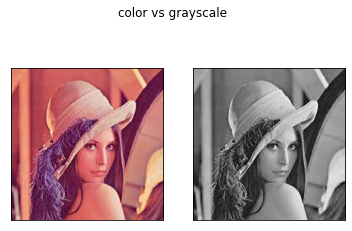

In [18]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color vs grayscale")
plt.show()

In [21]:
# 3 method: concatenate (join array)
gray = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

#img_combined = np.hstack((img, gray))
img_combined = np.concatenate((img,gray), axis = 1)
show_img("joined", img_combined)

In [2]:
# Ex 3
import cv2 as cv

cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")

fps = 15
ratio = 0.3
w, h = int(cap.get(3) * ratio),int(cap.get(4) * ratio)

out = cv.VideoWriter("videos/smaller_img_pexels.mp4", -1, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    #frame = cv.resize(frame, (int(width*ratio), int(height*ratio)))   
    frame = cv.resize(frame, (w,h))    
    cv.imshow("frame", frame)
    out.write(frame)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows()

In [42]:
#Ex 4
# 2 method: scale factor
import matplotlib.pyplot as plt
import cv2 as cv

scale = 2

img = cv.imread("images/dog.jfif")

img_resize_linear = cv.resize(img, None, fx=scale, fy=scale, interpolation = cv.INTER_LINEAR)
img_resize_cubic = cv.resize(img, None, fx=scale, fy=scale, interpolation = cv.INTER_CUBIC)
img_resize_nn = cv.resize(img, None, fx=scale, fy=scale, interpolation = cv.INTER_NEAREST)

cv.imshow("original", img)
cv.imshow("INTER_LINEAR", img_resize_linear)
cv.imshow("INTER_CUBIC", img_resize_cubic)
cv.imshow("INTER_NEAREST", img_resize_nn)

cv.waitKey(0) 
cv.destroyAllWindows()

#comment: cubic interpolation > linear interpolation > nearest interpolation, 
#cubic interpolation provides most detailed image and used highest computational cost compared to others.